# Exmample with pywavelets

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pywt

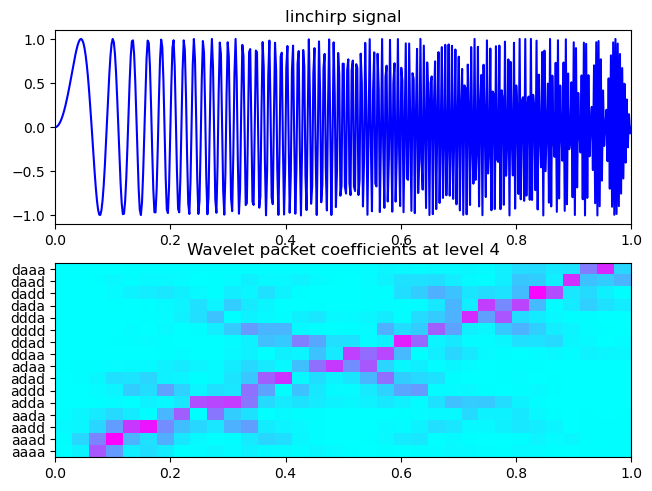

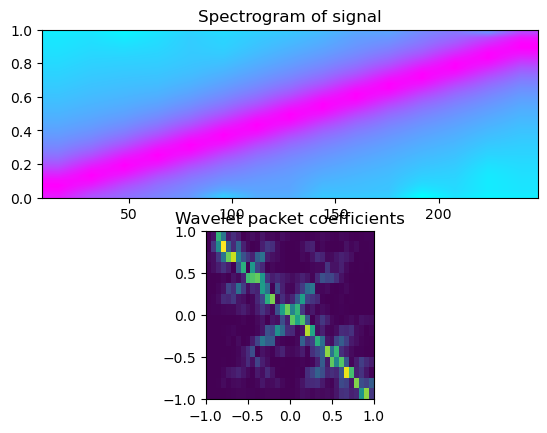

In [2]:
x = np.linspace(0, 1, num=512)
data = np.sin(250 * np.pi * x**2)

wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()

## Compute with scipy cwt

In [3]:
import scipy.signal as scsig

In [11]:
# Better selection of the "fundamental frequencies" of the wavelets
def wavelet_bp_freq(_fs, n):
    """
    To ensure the wavelet dyadic scaling is 2**k (Cf: Book by Mallat, p.28),
    its fundamental frequency needs to be computed as 
    
    Parameters
    ----------
    _fs: float [Hz]
        Sampling frequency
    n: int
        Number of bands
    """
    # Compute the bins (i.e. 0, f_Ny/64, f_Ny/32, f_Ny/16 ... f_Ny/2, f_Ny)
    f_Ny = _fs / 2 # Nyquest frequency
    denom = 2**(np.arange(0, n, dtype=float))
    bins = np.flipud(np.concatenate((f_Ny/denom, np.zeros(1))))
    # Wavelet "fundamental frequencies": center of each bin
    #f = (bins[:-1:] + bins[1::]) / 2
    f = bins[1:]
    return f

In [18]:
# Scipy
dx = x[1]-x[0]
fs = 1/dx
print(f'fs = {fs}Hz')

w = 5.0
#freq = np.linspace(1, fs/2, 250)
freq = wavelet_bp_freq(fs, 10)
widths = w*fs / (2*freq*np.pi)

cwtm = scsig.cwt(data, scsig.morlet2, widths, w=w)

fs = 511.0Hz


In [19]:
freq

array([  0.49902344,   0.99804688,   1.99609375,   3.9921875 ,
         7.984375  ,  15.96875   ,  31.9375    ,  63.875     ,
       127.75      , 255.5       ])

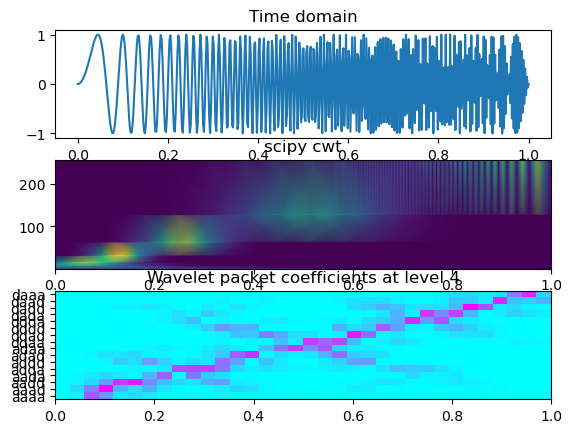

In [20]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(x, data)
axs[0].set_title('Time domain')

# Scipy cwt
# axs[1].imshow(
#     np.abs(cwtm), cmap='viridis', aspect='auto',
#     extent=[0, 1, 0, cwtm.shape[0]]
# )
axs[1].pcolormesh(x, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
#axs[1].invert_yaxis()
axs[1].set_title('scipy cwt')

# Wavelet packt transform with pywavelets
axs[2].set_title("Wavelet packet coefficients at level %d" % level)
axs[2].imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
axs[2].set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

plt.show()